In [2]:
%%capture
from bokeh.io import output_notebook
output_notebook(verbose=False)
import holoviews as hv
from holoviews import dim, opts
hv.extension('matplotlib')

(1256, 289)


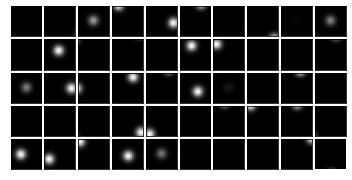

In [3]:
import numpy as np
from tallem.datasets import *

## Sample images
samples, params, blob, c = white_dot(n_pixels=17, r=0.35, n=(1200, 100), method="grid")
print(samples.shape)

%matplotlib inline
ind = np.random.choice(range(samples.shape[0]), size=5*10, replace=False)
fig, ax = plot_images(samples[ind,:], shape=(17,17), max_val=c, layout=(5,10), figsize=(6,3))

In [4]:
%matplotlib inline
from tallem.samplers import landmarks
Lind, Lrad = landmarks(samples, k = 400)
ind = np.random.choice(Lind, size=6*10, replace=False)
fig, ax = plot_images(samples[ind,:], shape=(17,17), max_val=c, layout=(6,10), figsize=(6,3))

In [5]:
from tallem.cover import LandmarkCover
X = np.vstack((samples[Lind,:], samples[-100:,:]))
cover = LandmarkCover(X, n_sets=10, scale=5.50) # 20, 1.3
print(cover)

In [6]:
from tallem import TALLEM
top = TALLEM(cover, "iso3", D=3).fit(X=X)

In [7]:
hv.Scatter3D(top.fit_transform(X=X))

:Scatter3D   [x,y,z]

In [8]:
# hv.Scatter3D(isomap(X))

In [ ]:
from tallem.dimred import pca, isomap, lle, laplacian_eigenmaps, mmds, hessian_lle, ltsa
x_hle = hessian_lle(X, 3, n_neighbors=15)
x_pca = pca(X, 3)
x_mmds = mmds(X, 3)
x_lle = lle(X, 3)
x_le = laplacian_eigenmaps(X, 3)
x_iso = isomap(X, 3)
x_tallem = top.embedding_
x_ltsa = ltsa(X, 3)

In [ ]:
import holoviews as hv
from holoviews import dim, opts
hv.extension('matplotlib')

## Configure holoviews
opts.defaults(
	opts.Image(cmap="gray_r", axiswise=True),
	opts.Points(cmap="bwr", edgecolors='k', s=50, alpha=1.0), # Remove color_index=2
	opts.RGB(bgcolor="white", show_grid=False),
	opts.Scatter3D(color='z', fig_size=250, cmap='fire', edgecolor='k', s=25, alpha=0.80)
)
import colorcet as cc
from tallem.distance import dist
from tallem.color import bin_color

def hist_equalize(x, scale=1000, number_bins=100000):
	h, bins = np.histogram(x.flatten(), number_bins, density=True)
	cdf = h.cumsum() # cumulative distribution function
	cdf = np.max(x) * cdf / cdf[-1] # normalize
	return(np.interp(x.flatten(), bins[:-1], cdf))

## Use distance to black image as color gradient
d = dist(np.zeros_like(X[0,:]), X)
pt_color = list(bin_color(hist_equalize(d, number_bins=100), cc.bmy).flatten())
scatter_opts = opts.Scatter3D(azimuth=-50, elevation=25, color='d', cmap='fire', s=18, edgecolor='gray',linewidth=0.30, alpha = 1.00)

# pc = hv.Table({'x': emb[:,0], 'y': emb[:,1], 'z': emb[:,2], 'd': hist_equalize(d) }, kdims=["x", "y", "z"], vdims=["d"])
# hv.Scatter3D(pc).opts(scatter_opts(color='d', cmap="viridis", s=16, edgecolor='gray',linewidth=0.30))


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [ ]:
## Standardize settings for each 
from tallem.distance import dist
from tallem.alignment import opa
embeddings = [x_tallem, x_pca, x_mmds, x_iso, x_lle, x_le, x_hle, x_ltsa]
for i, emb in enumerate(embeddings):
	embeddings[i] = emb - emb.mean(axis=0)
	embeddings[i] = embeddings[i] / np.linalg.norm(embeddings[i])
	# embeddings[i] = embeddings[i] / np.max(dist(embeddings[i]))

for i, emb in enumerate(embeddings):
	embeddings[i] = opa(emb, embeddings[0], coords=True)

In [ ]:
from tallem.distance import dist 
for emb in embeddings:
	print(np.max(dist(emb)))

0.9999999999999991
0.9587087498578195
0.9393471321876536
1.1594916835777116
0.4224393867860982
0.9379750495307114
0.6816344161169601
1.0171306454910343


:Layout
   .Scatter3D.I    :Scatter3D   [x,y,z]   (d)
   .Scatter3D.II   :Scatter3D   [x,y,z]   (d)
   .Scatter3D.III  :Scatter3D   [x,y,z]   (d)
   .Scatter3D.IV   :Scatter3D   [x,y,z]   (d)
   .Scatter3D.V    :Scatter3D   [x,y,z]   (d)
   .Scatter3D.VI   :Scatter3D   [x,y,z]   (d)
   .Scatter3D.VII  :Scatter3D   [x,y,z]   (d)
   .Scatter3D.VIII :Scatter3D   [x,y,z]   (d)
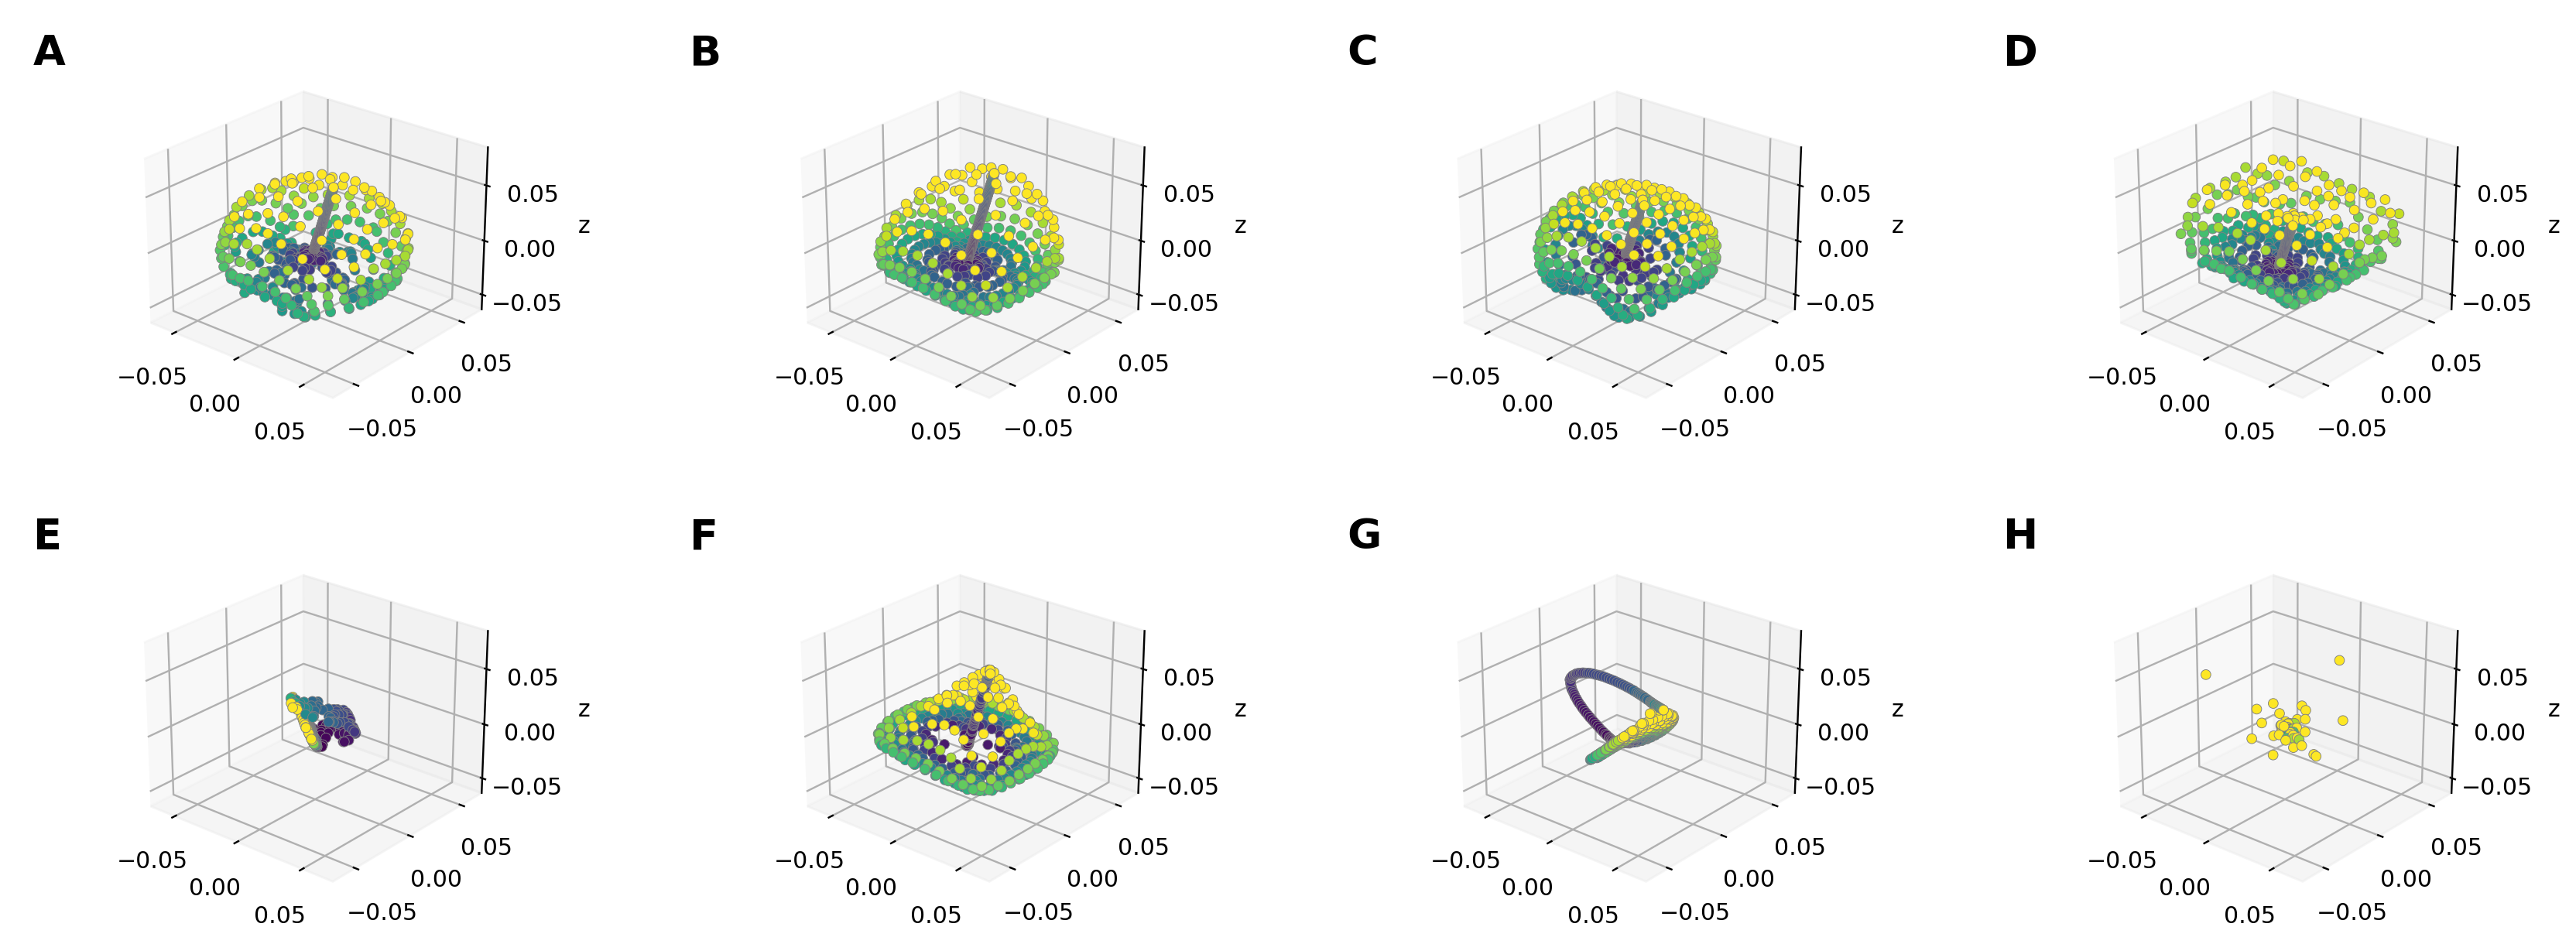

In [ ]:
renderer = hv.plotting.mpl.MPLRenderer.instance(dpi=300)
hv_plots = []
for emb in embeddings:
	pc = hv.Table({'x': emb[:,0], 'y': emb[:,1], 'z': emb[:,2], 'd': hist_equalize(d) }, kdims=["x", "y", "z"], vdims=["d"])
	cp = hv.Scatter3D(pc).opts(scatter_opts(cmap="viridis", xaxis=None, yaxis=None))
	hv_plots.append(cp)

hv.output(fig='png', dpi=72*3)
grid_plot = (hv_plots[0] + hv_plots[1] + hv_plots[2] + hv_plots[3] + hv_plots[4] + hv_plots[5] + hv_plots[6] + hv_plots[7])
grid_plot

In [ ]:
np.linalg.norm(embeddings[4])

0.2856371639788678

In [ ]:
grid_plot.opts(tight=True, aspect_weight=False, fig_size=800)
hv.save(grid_plot, 'grid_plots.png', backend='matplotlib')

In [ ]:
hv_plots[4]

:Scatter3D   [x,y,z]   (d)